# Supervised Learning
## Classification
### Author: Mohammed A. Shehab

---

## **Introduction**
This notebook demonstrates:
1. 𝑘-Nearest Neighbors (k-NN)
2. Decision Tree (DT)
3. Support Vector Machine (SVM)

---


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### Generate Synthetic Data

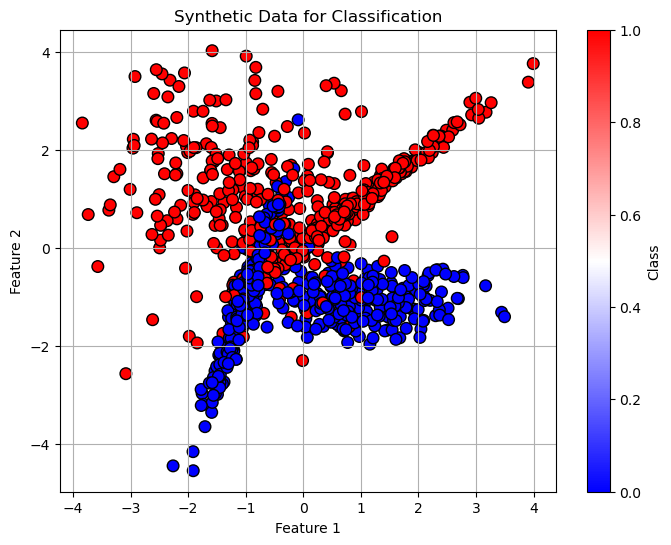

In [2]:
# NOTE: you can use only one, so if you want to see results of dataset1, please comment the dataset2 and so if you want to see dataset2 results
# Dataset 1
X, y = make_classification(
    n_samples=1_000, n_features=2, n_informative=2, n_redundant=0, random_state=42
)

# Dataset 2
# X, y = make_moons(n_samples=1_000, noise=0.1, random_state=42)

# Visualize the Data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=70)
plt.title("Synthetic Data for Classification")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.grid(True)
plt.show()

## Histogram to Show Overlapping Areas

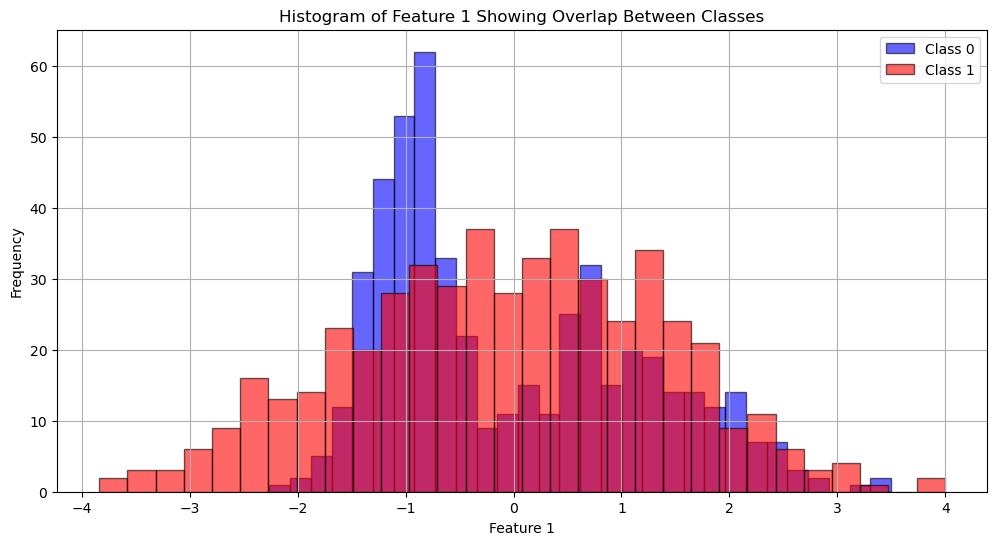

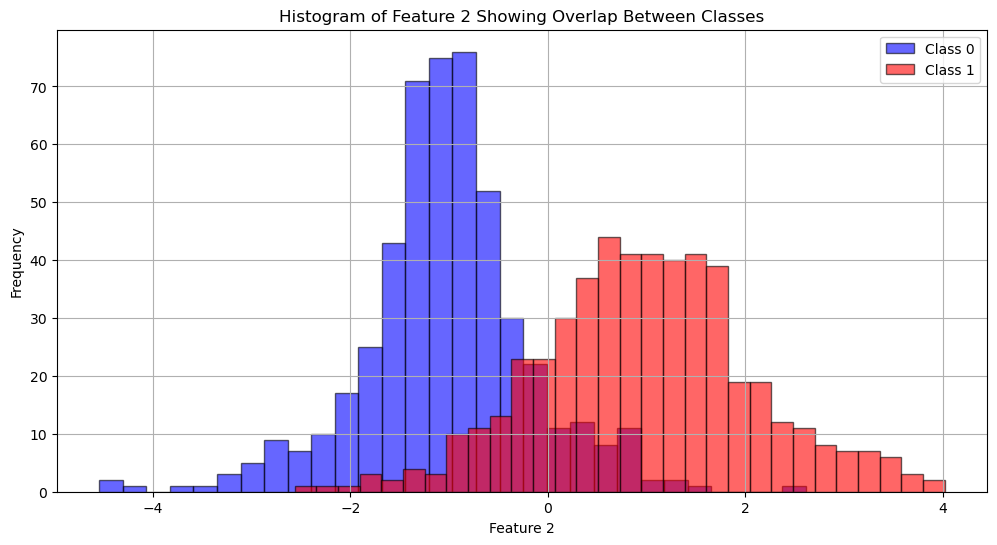

In [3]:
# Separate the data by class
X_class0 = X[y == 0]
X_class1 = X[y == 1]

# Plot histograms for Feature 1
plt.figure(figsize=(12, 6))

# Histogram for Class 0
plt.hist(X_class0[:, 0], bins=30, alpha=0.6, color='blue', label='Class 0', edgecolor="k")

# Histogram for Class 1
plt.hist(X_class1[:, 0], bins=30, alpha=0.6, color='red', label='Class 1', edgecolor="k")

# Add labels and legend
plt.title("Histogram of Feature 1 Showing Overlap Between Classes")
plt.xlabel("Feature 1")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Repeat for Feature 2
plt.figure(figsize=(12, 6))

# Histogram for Class 0
plt.hist(X_class0[:, 1], bins=30, alpha=0.6, color='blue', label='Class 0', edgecolor="k")

# Histogram for Class 1
plt.hist(X_class1[:, 1], bins=30, alpha=0.6, color='red', label='Class 1', edgecolor="k")

# Add labels and legend
plt.title("Histogram of Feature 2 Showing Overlap Between Classes")
plt.xlabel("Feature 2")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


### Measure Overlapping Area

In [4]:
from scipy.stats import gaussian_kde
# Function to calculate overlapping area
def calculate_overlap(X_class0, X_class1):
    # KDE for both classes
    kde_class0 = gaussian_kde(X_class0)
    kde_class1 = gaussian_kde(X_class1)
    
    # Create a range of values spanning both classes
    x_range = np.linspace(min(min(X_class0), min(X_class1)), max(max(X_class0), max(X_class1)), 1000)
    
    # Evaluate PDFs for both classes
    pdf_class0 = kde_class0(x_range)
    pdf_class1 = kde_class1(x_range)
    
    # Compute overlap as the area under the minimum of the two curves
    overlap_area = np.trapz(np.minimum(pdf_class0, pdf_class1), x_range)
    
    return x_range, pdf_class0, pdf_class1, overlap_area

In [5]:
# Measure overlap for Feature 1
x_range1, pdf_class0_f1, pdf_class1_f1, overlap_f1 = calculate_overlap(X_class0[:, 0], X_class1[:, 0])

# Measure overlap for Feature 2
x_range2, pdf_class0_f2, pdf_class1_f2, overlap_f2 = calculate_overlap(X_class0[:, 1], X_class1[:, 1])
# Print Overlap Areas
print(f"Overlap Area for Feature 1: {overlap_f1:.2f}")
print(f"Overlap Area for Feature 2: {overlap_f2:.2f}")

Overlap Area for Feature 1: 0.81
Overlap Area for Feature 2: 0.28


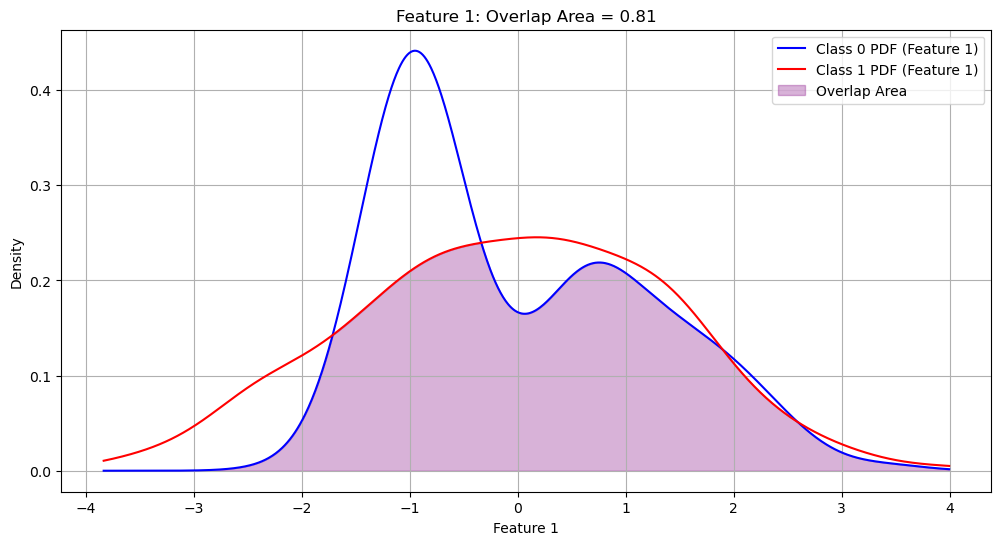

In [6]:
# Plot Feature 1
plt.figure(figsize=(12, 6))
plt.plot(x_range1, pdf_class0_f1, label='Class 0 PDF (Feature 1)', color='blue')
plt.plot(x_range1, pdf_class1_f1, label='Class 1 PDF (Feature 1)', color='red')
plt.fill_between(x_range1, np.minimum(pdf_class0_f1, pdf_class1_f1), color='purple', alpha=0.3, label='Overlap Area')
plt.title(f"Feature 1: Overlap Area = {overlap_f1:.2f}")
plt.xlabel("Feature 1")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

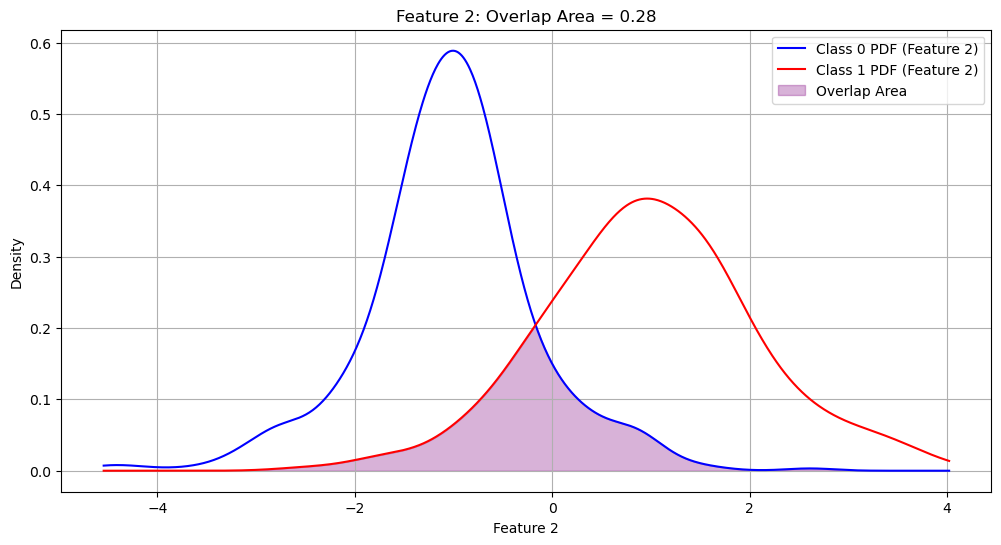

In [7]:
# Plot Feature 2
plt.figure(figsize=(12, 6))
plt.plot(x_range2, pdf_class0_f2, label='Class 0 PDF (Feature 2)', color='blue')
plt.plot(x_range2, pdf_class1_f2, label='Class 1 PDF (Feature 2)', color='red')
plt.fill_between(x_range2, np.minimum(pdf_class0_f2, pdf_class1_f2), color='purple', alpha=0.3, label='Overlap Area')
plt.title(f"Feature 2: Overlap Area = {overlap_f2:.2f}")
plt.xlabel("Feature 2")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


## Data prepretion
Split data into training and testing sets


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Training data size = {len(X_train)} rows")
print(f"Testing data size = {len(X_test)} rows")

Training data size = 700 rows
Testing data size = 300 rows


### Configure k-NN Classifier

In [9]:
k = 2  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

### Visualize Decision Boundaries

In [10]:
def plot_decision_boundary(knn, X, y, title="k-NN Decision Boundary"):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict on grid points
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolor="k")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()



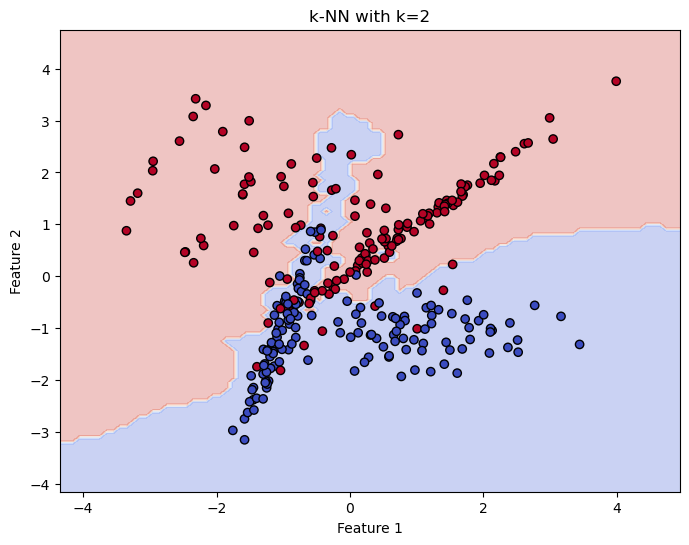

In [11]:
plot_decision_boundary(knn, X_test, y_test, title=f"k-NN with k={k}")

### Configure SVM Classifier

In [12]:
from sklearn.svm import SVC

svm = SVC(kernel="linear", C=1)  # Linear kernel with regularization parameter C
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [13]:
def plot_decision_boundary(model, X, y, title="SVM Decision Boundary"):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict on grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="bwr")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k", s=70)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.colorbar(label="Class")
    plt.grid(True)
    plt.show()


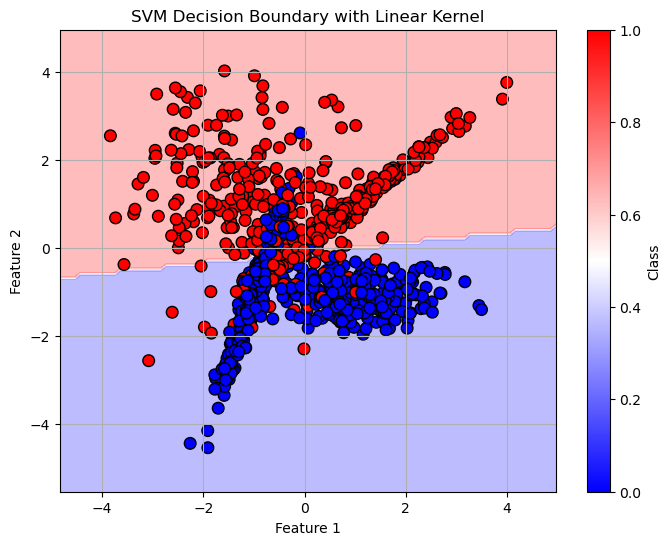

In [14]:
plot_decision_boundary(svm, X, y, title="SVM Decision Boundary with Linear Kernel")

### Different SVM kernel

In [15]:
svm = SVC(kernel="rbf", C=1)  # Linear kernel with regularization parameter C
svm.fit(X_train, y_train)

SVC(C=1)

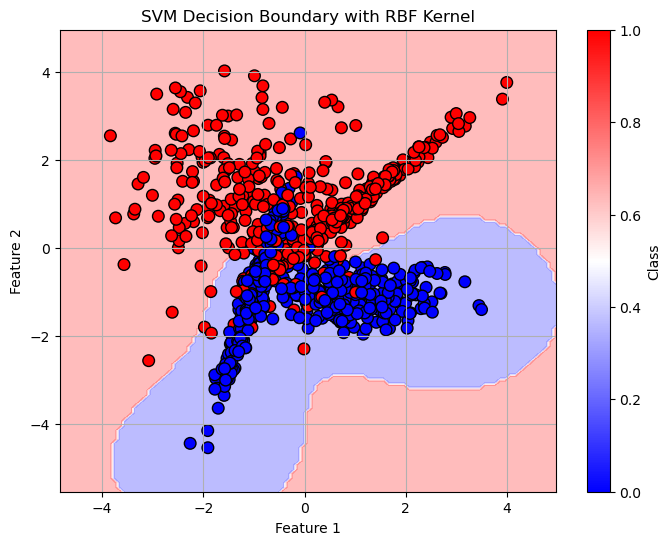

In [16]:
plot_decision_boundary(svm, X, y, title="SVM Decision Boundary with RBF Kernel")

In [17]:
# Define Hyperparameter Combinations
param_grid = [
    {"C": 0.1, "gamma": 0.1},
    {"C": 1, "gamma": 0.1},
    {"C": 1, "gamma": 1},
    {"C": 10, "gamma": 1}
]

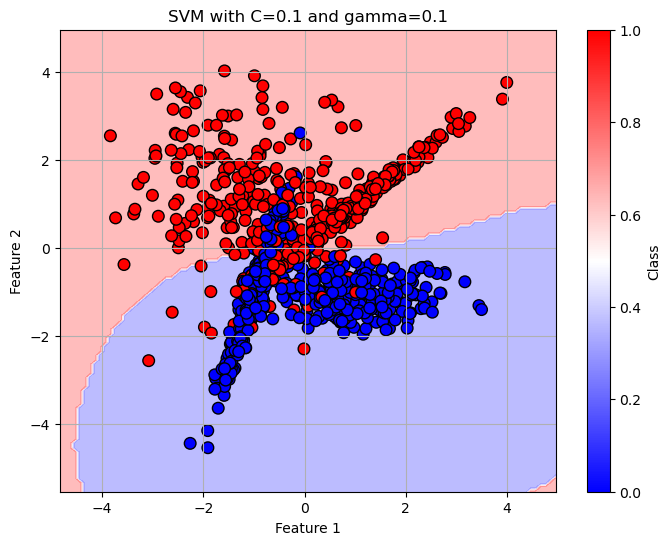

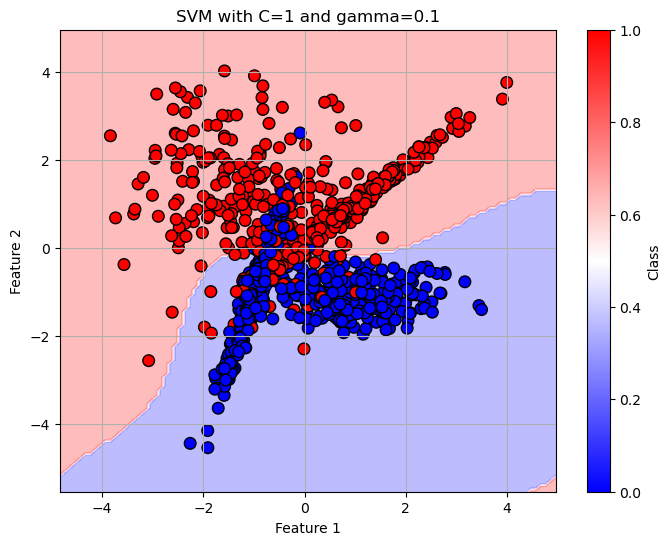

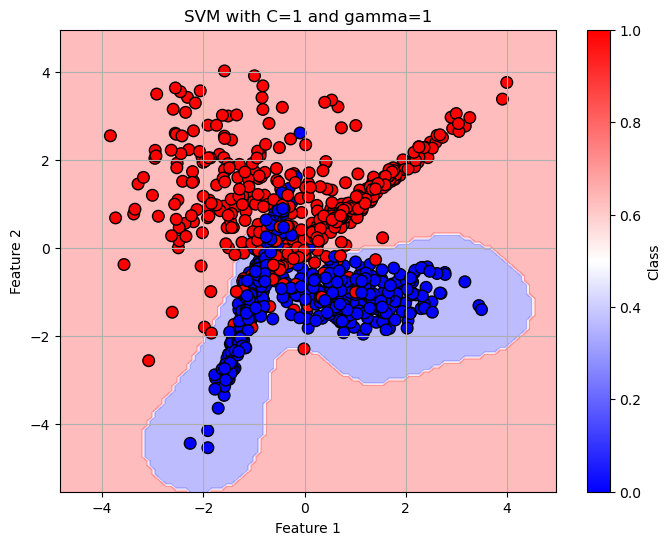

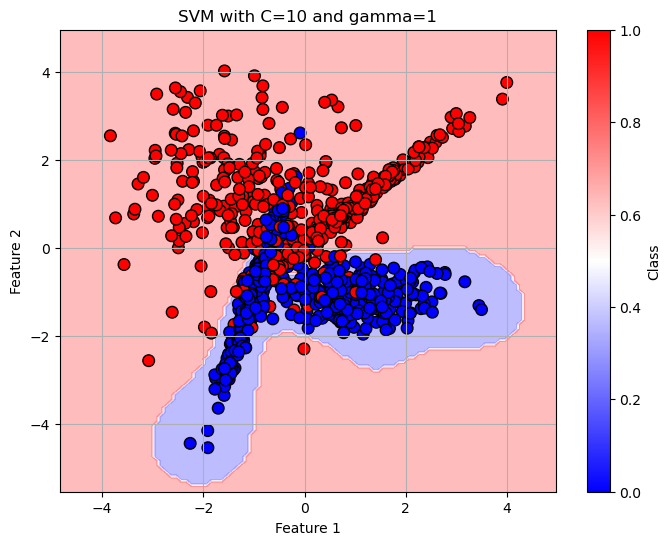

In [18]:
for params in param_grid:
    svm = SVC(kernel="rbf", C=params["C"], gamma=params["gamma"])
    svm.fit(X, y)
    plot_decision_boundary(svm, X, y, f"SVM with C={params['C']} and gamma={params['gamma']}")



### **Hyperparameter Combinations and Their Effects**

1. **Low $C=0.1$, Low $\gamma=0.1$:**
   - Broad decision boundary, leading to underfitting.

2. **Medium $C=1$, Low $\gamma=0.1$:**
   - Generalized decision boundary, achieving a balanced fit.

3. **Medium $C=1$, High $\gamma=1$:**
   - Tighter decision boundary, slightly overfitting the training data.

4. **High $C=10$, High $\gamma=1$:**
   - Very complex decision boundary, high risk of overfitting.

---


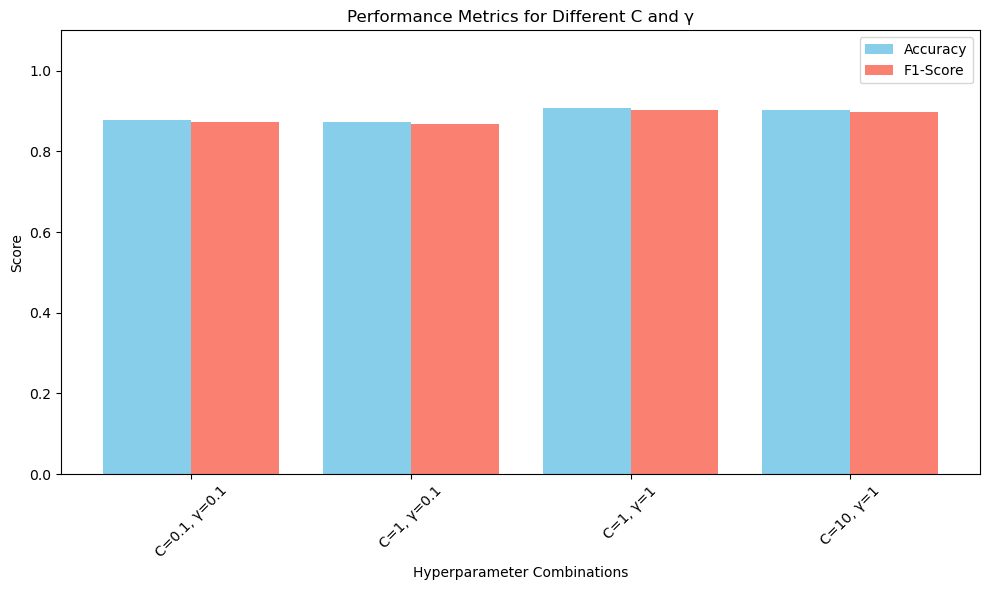

In [19]:
from sklearn.metrics import f1_score, accuracy_score
f1_scores = []
accuracies = []
labels = []
# Train SVM and Evaluate
for params in param_grid:
    # Train SVM
    svm = SVC(kernel="rbf", C=params["C"], gamma=params["gamma"])
    svm.fit(X_train, y_train)
    
    # Predict on Test Set
    y_pred = svm.predict(X_test)
    
    # Compute Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    accuracies.append(acc)
    f1_scores.append(f1)
    labels.append(f"C={params['C']}, γ={params['gamma']}")

# Plot F1-Score and Accuracy
x = np.arange(len(param_grid))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, accuracies, width=0.4, label="Accuracy", color="skyblue")
plt.bar(x + 0.2, f1_scores, width=0.4, label="F1-Score", color="salmon")
plt.xticks(x, labels, rotation=45)
plt.title("Performance Metrics for Different C and γ")
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()

### Configure Decision Tree (DT) Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


**Train Decision Tree**

In [21]:

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

**Visualize Decision Tree**

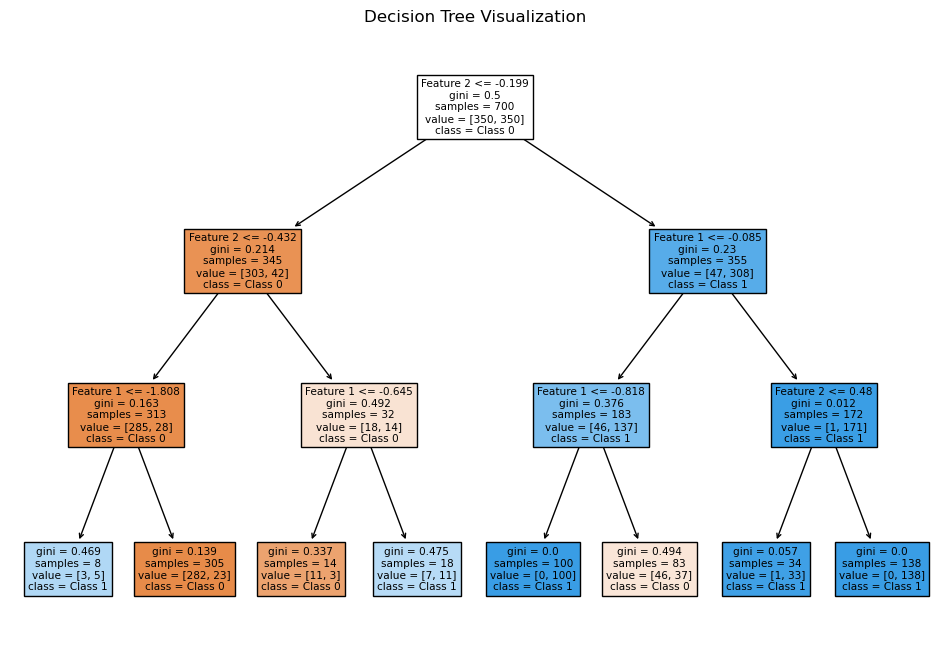

In [22]:
plt.figure(figsize=(12, 8))
plot_tree(tree, filled=True, feature_names=["Feature 1", "Feature 2"], class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Visualization")
plt.show()


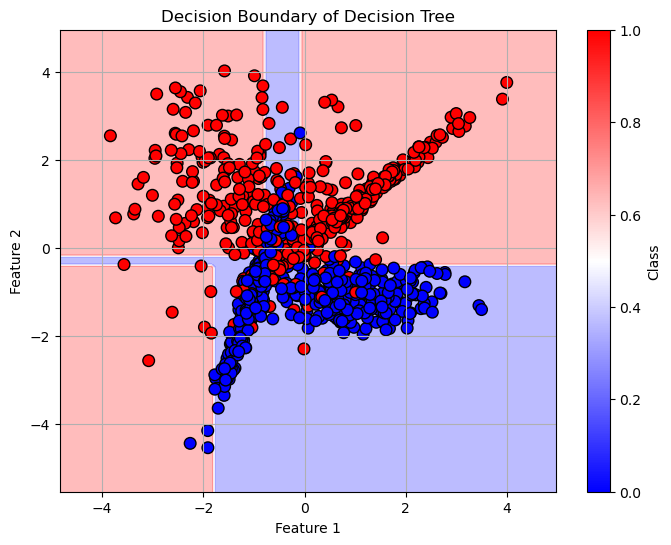

In [23]:
plot_decision_boundary(tree, X, y, title="Decision Boundary of Decision Tree")

In [24]:
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"Accuracy: {f1:.2f}")

Accuracy: 0.88
Accuracy: 0.87
